# Numerical Differentiation

We did already have a look at the numerical differentiation in Lecture 3. We therefore don't have to extend that to much here. Yet we want to formalize the numerical differentiation a bit.

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

## First order derivative

Our previous way of finding the derivative was based on its definition


\begin{equation}
f^{\prime}(x)=\lim_{\delta x \rightarrow 0}\frac{f(x+x_{0})-f(x)}{\Delta x}
\end{equation}

such that, if we don't the limit we can approximate the derivative by

\begin{equation}
f^{\prime}_{i}\approx \frac{f_{i+1}-f_{i-1}}{2\Delta x}
\end{equation}

Here we look at the left and right of the current posiiton $i$ and thus have to devide by the twice the interval $\Delta x$.

Some better notation may be found by the Taylor expansion:

\begin{equation}
f(x)=f(x_{0})+(x-x_0)f^{\prime}(x)+\frac{(x-x_0)^2}{2!}f^{\prime\prime}(x)+\frac{(x-x_0)^3}{3!}f^{(3)}(x)+\ldots
\end{equation}

which gives in discrete notation

\begin{equation}
f_{i+1}=f_{i}+\Delta x f_{i}^{\prime}+\frac{\Delta x^2 }{2!}f_{i}^{\prime\prime}+\frac{\Delta x^3 }{3!}f_{i}^{(3)}+\ldots
\end{equation}

The same can be done to obtain the function value at $i-1$

\begin{equation}
f_{i-1}=f_{i}-\Delta x f_{i}^{\prime}+\frac{\Delta x^2 }{2!}f_{i}^{\prime\prime}-\frac{\Delta x^3 }{3!}f_{i}^{(3)}+\ldots
\end{equation}

Subtracting the two last equations, i.e. calculating $f_{i+1}-f_{i-1}$, results in 

\begin{equation}
f_{i+1}-f_{i-1}=2\Delta x f_{i}^{\prime}+2\frac{\Delta x^3}{6} f_{i}^{(3)}+ \ldots
\end{equation}

which yields when neglecting the last term on the right side

\begin{equation}
f^{\prime}_{i}\approx \frac{f_{i+1}-f_{i-1}}{2\Delta x}
\end{equation}

This is the formula we obtained from the definition of the derivative. Using this we obtained already a function calculating the derivative.


In [30]:
def D(f, x, h=1.e-9, *params):
    return (f(x+h, *params)-f(x, *params))/(h)

One may continue that type of derivation now to obtain higher order approximation of the first derivative with better accuracy. For that purpose you may calculate now $f_{i\pm 2}$ and combining that with $f_{i+1}-f_{i-1}$ will lead to

\begin{equation}
f_{i}^{\prime}=\frac{1}{12 \Delta x}(f_{i-2}-8f_{i-1}+8f_{i+1}-f_{i-2})
\end{equation}

This can be used to give better values for the first derivative.

### Matrix version

If we supply to the above function an array of positions $x_{i}$ at which we would like to calculate the derivative, the we obtain and array of derivative values. We can write this procedure also in a different way, which will be helpful for solving differential equation later.

If we consider the above finite difference formulas for a set of positions $x_{i}$, we can represent the first derivative at these positions by matrix operation as well:

$f^{\prime}=\frac{1}{\delta x}
\begin{bmatrix}
-1 & 1  & 0 & 0 & 0 & 0\\
 0 & -1 & 1 & 0 & 0 & 0\\
 0 & 0  & -1 & 1 & 0 & 0\\
 0 & 0  & 0  & -1 & 1 & 0\\
 0 & 0  & 0  &  0 & -1 & 1\\
 0 & 0  & 0  &  0 &  0 & -1\\
\end{bmatrix}
\begin{bmatrix}
x_{1}\\
x_{2}\\
x_{3}\\
x_{4}\\
x_{5}\\
x_{6}
\end{bmatrix}
=
\begin{bmatrix}
(x_{2}-x_{1})/\delta x\\
(x_{3}-x_{2})/\delta x\\
(x_{4}-x_{3})/\delta x\\
(x_{5}-x_{4})/\delta x\\
(x_{6}-x_{5})/\delta x\\
(0-x_{6})/\delta x\\
\end{bmatrix}$

Note that we took here the derivative only to the right side! Each row of the matrix multiplied by the vector containing the positions is then containing the derivative of the function $f$ at the position $x_{i}$ and the resulting vector represents the deravitave in a certain position region. 

We will demonstrate how to generate such a mtrix with the `SciPy` module below.

## Second order derivative

Higher order derivatives are also available from the same process. By adding $f_{i+2}$ and $f_{i-1}$ we arrive at 

\begin{equation}
f_{i}^{\prime\prime}\approx \frac{f_{i-1}-2f_{i}+f_{i+1}}{\Delta x^2}
\end{equation}

gives the basic equation for calculating the second order derivative and the next order may be obtained from

\begin{equation}
f_{i}^{\prime\prime}\approx \frac{1}{12 \Delta x^{2}}(-f_{i-2}+16f_{i-1}-30 f_{i}+16f_{i+1}-f_{i+2})
\end{equation}

## SciPy Module

Of course, we are not the first to define some functions for calculating the derivative of functions numerically. This is already implemented in different modules. One module is the above mentioned `SciPy` module. 

The `SciPy` module provides the method `derivative`, which we can call with

~~~
derivative(f,x,dx=1.0,n=1):
~~~

This will calculate the n$th$ derivative of the function $f$ at the position $x$ with a intervall $dx=1.0$ (default value).

In [38]:
## the derivative method is hidden in the `misc` sub-module of `SciPy`.
from scipy.misc import derivative

In [39]:
derivative(np.sin,np.pi,dx=0.1,n=1,order=3)

-0.9983341664682823

### Matrix version

The `SciPy` module also allows us to construct the matrices as mentioned above.  We will need the
`diags` method from the `SciPy` module for that purpose.

In [40]:
from scipy.sparse import diags

Lets assume, we want to calculate the derivative of the `sin` function at certain positions.

In [46]:
N=100
x=np.linspace(-5,5,N)
y=np.sin(x)

The `diags` function uses a set of numbers, that shoud be distributed along the diagonal of the matrix. If you supply a list like in the example below, the numbers are distributed using the offsets as defined in the second list. The `shape` keyword defines the shape of the matrix. Try the example in the over next cell with the `.todense()` suffix. This converts the otherwise unreadable sparse output to a readable matrix form.

In [44]:
diags([-1., 0., 1.], [0,-1, 1],shape=(10,10)).todense()

matrix([[-1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., -1.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.]])

To comply with out previous definition of N=100 data point and the intervall $dx$, we define 

In [56]:
m=diags([-1., 0., 1.], [0,-1, 1],shape=(N,N))/(x[1]-x[0])

The derivative is then only a simple elementwise matrix multiplication.

In [58]:
diff=m*y

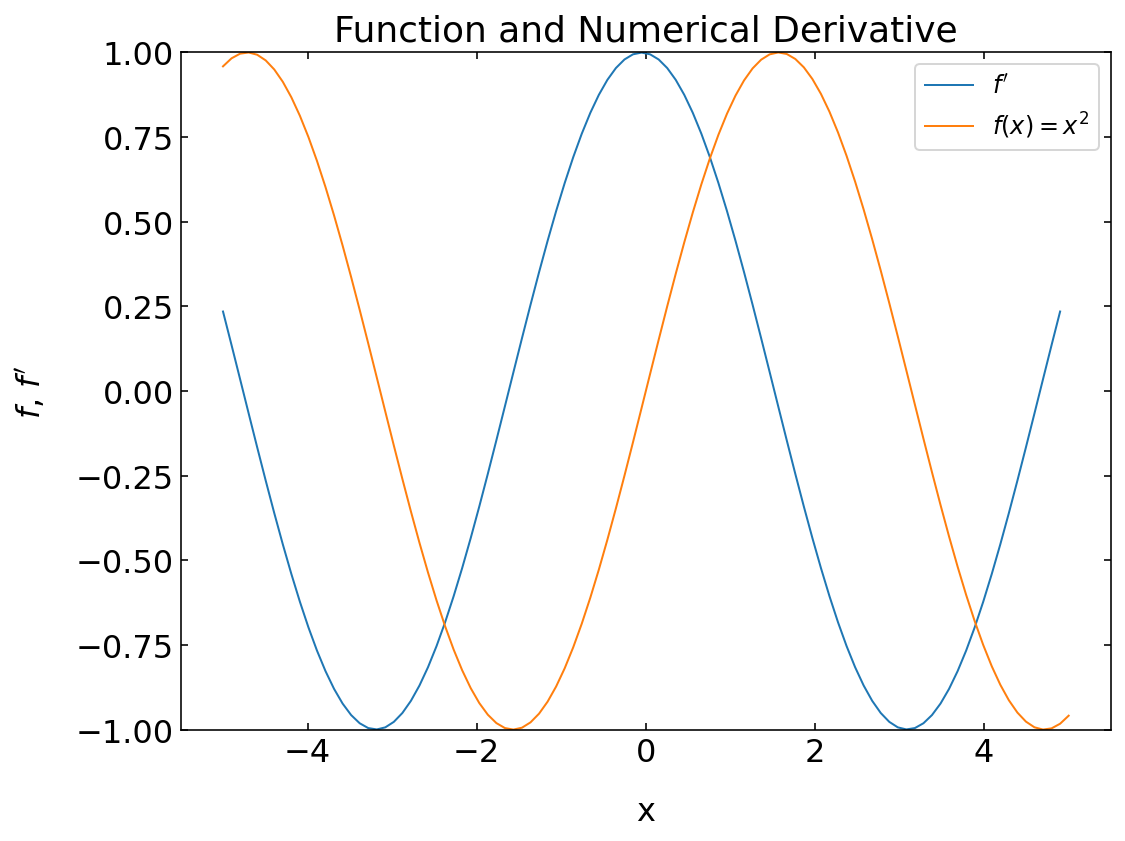

In [61]:
plt.figure(figsize=(8,6))
plt.plot(x[:-1],diff[:-1],label='$f^{\prime}$')
plt.plot(x,y,label='$f(x)=x^{2}$')
plt.xlabel('x')
plt.ylabel('$f$, $f^{\prime}$')
plt.legend()
plt.ylim(-1,1)
plt.title('Function and Numerical Derivative')
plt.tight_layout()
plt.show()

Check yourself, that the following line of code will calculate the second derivative. 

~~~
m=diags([-2., 1., 1.], [0,-1, 1], shape=(100, 100))
~~~